In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape = (2,10)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_length = 2, input_dim = 10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


tensorflow의 역사

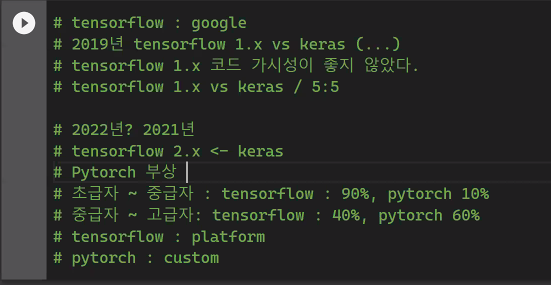

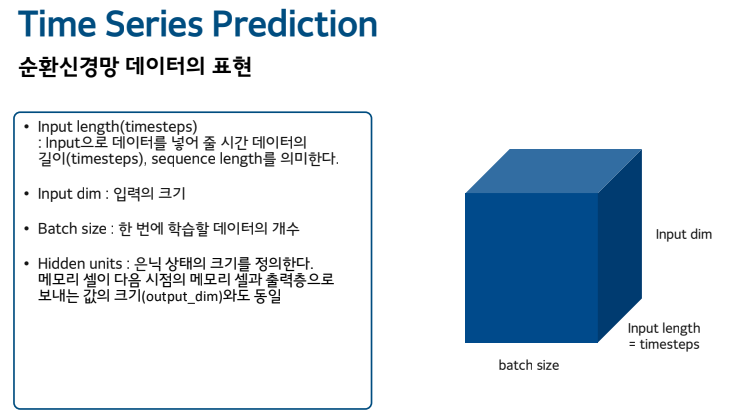

In [7]:
# use batch
model = Sequential()
# model.add
model.add(SimpleRNN(3, batch_input_shape = (8, 2, 10)))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [8]:
# output shape이 어떻게 달라지는지 잘 확인할 것!

### Use batch / return_sequence = True

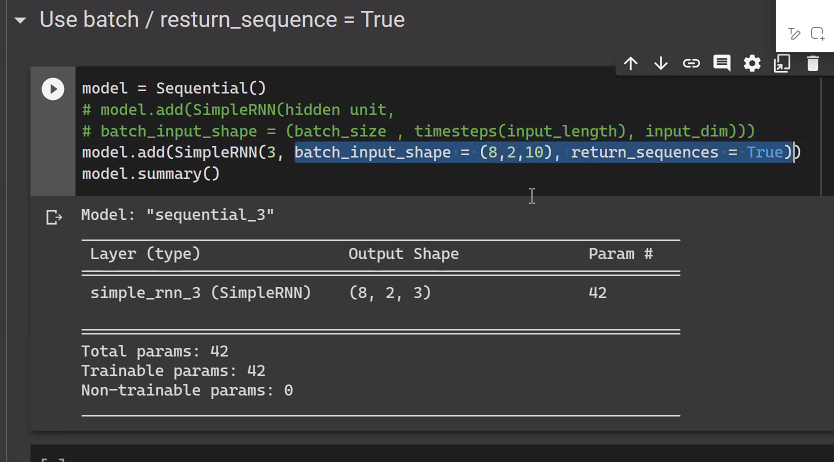

### 깊은 순환 신경망

In [9]:
model = Sequential()
# timesteps = input_length
model.add(SimpleRNN(3, input_length = 10, input_dim = 5, return_sequences=True))
model.add(SimpleRNN(3, return_sequences=True))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 10, 3)             27        
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 10, 3)             21        
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# (None, 10, 3) 배치가 1이라고 생각하면 된다.

## Simple RNN(use Data)

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM


# time step = 4 ,input dim = 5 ,batch size = 1
train_X = [[
    [0.1, 4.2, 1.5, 1.1, 2.8], 
    [1.0, 3.1, 2.5, 0.7, 1.1],
    [0.3, 2.1, 1.5, 2.1, 0.1],
    [2.2, 1.4, 0.5, 0.9, 1.1]
    ]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


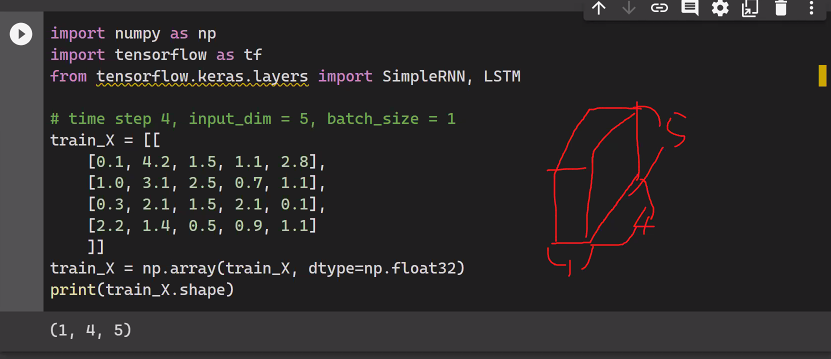

### hidden_unit = 3

In [17]:
rnn = SimpleRNN(3)
hidden_states = rnn(train_X)
print(f'input shape : {train_X.shape}')
print(f'hidden(output) shape : {hidden_states.shape}')
# 하나의 히든가지고 3개의 

input shape : (1, 4, 5)
hidden(output) shape : (1, 3)


### hidden_unit = 3, return_sequence = True

In [19]:
rnn = SimpleRNN(3, return_sequences = True)
hidden_states = rnn(train_X)
print(f'input shape : {train_X.shape}')
print(train_X)
print(hidden_states)

input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
tf.Tensor(
[[[-0.47467402 -0.8833586   0.9449507 ]
  [ 0.36995795 -0.03286364  0.95054686]
  [-0.96524864 -0.03347403  0.45391545]
  [ 0.62100583 -0.27995378  0.87020695]]], shape=(1, 4, 3), dtype=float32)


### return_state = True인 경우에는 return_sequence의 True/False와 관계없이 last_states는 마지막 hidden state를 출력

In [22]:
rnn = SimpleRNN(3, return_sequences = True, return_state = True)
hidden_states, last_states = rnn(train_X)
print(f'input shape : {train_X.shape}')
print(train_X)
print(hidden_states)
print(last_states)

input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
tf.Tensor(
[[[ 0.25376803  0.9994712  -0.9532969 ]
  [ 0.03711996  0.99242085  0.54548526]
  [-0.16730602  0.87462467  0.08618767]
  [-0.8246033   0.7945959  -0.8310083 ]]], shape=(1, 4, 3), dtype=float32)
tf.Tensor([[-0.8246033  0.7945959 -0.8310083]], shape=(1, 3), dtype=float32)


In [23]:
rnn = SimpleRNN(3, return_sequences = True, return_state = True)
hidden_states, last_states = rnn(train_X)
# print(f'input shape : {train_X.shape}')
# print(train_X)
print('-----hidden-----')
print(hidden_states)
print('-----last-----')
print(last_states)

-----hidden-----
tf.Tensor(
[[[ 0.99993587  0.95506305  0.9990232 ]
  [ 0.99987006  0.3088348   0.9589657 ]
  [ 0.9988307  -0.08057866  0.03688199]
  [ 0.91315174 -0.89935464  0.56216234]]], shape=(1, 4, 3), dtype=float32)
-----last-----
tf.Tensor([[ 0.91315174 -0.89935464  0.56216234]], shape=(1, 3), dtype=float32)


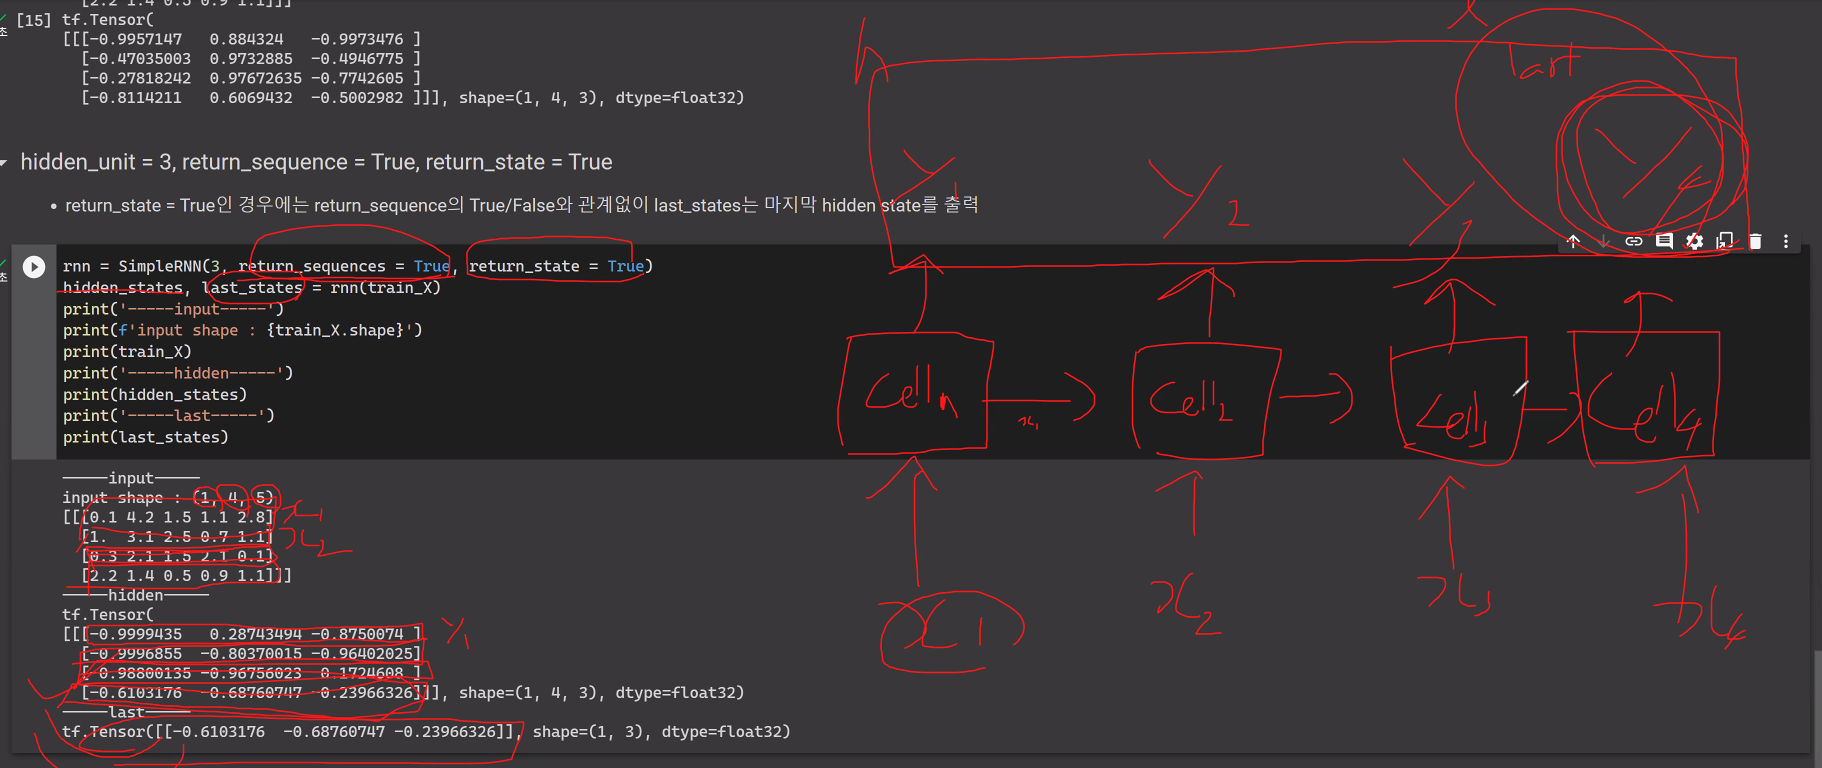

In [28]:
# RNN 의 문제점:
# 최근치에 가중치가 더 주어진다. x1은 옅어져서 가중치가 적다, 옛날 기억이 묽어진다

In [26]:
rnn = SimpleRNN(3, return_sequences = False, return_state = True)
hidden_states, last_states = rnn(train_X)
# print(f'input shape : {train_X.shape}')
# print(train_X)
print('-----hidden-----')
print(hidden_states)
print('-----last-----')
print(last_states)

-----hidden-----
tf.Tensor([[-0.19925405 -0.6970097   0.9821737 ]], shape=(1, 3), dtype=float32)
-----last-----
tf.Tensor([[-0.19925405 -0.6970097   0.9821737 ]], shape=(1, 3), dtype=float32)


In [27]:
# 넣어둔 shape과 나온 shape 의 차이를 주로 기억해두자

In [35]:
rnn = SimpleRNN(3, return_sequences = False, return_state = True)
hidden_states, last_states = rnn(train_X)
print('-----input-----')
print(f'input shape : {train_X.shape}')
print(train_X)
print('-----hidden-----')
print(hidden_states)
print('-----last-----')
print(last_states)

-----input-----
input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
-----hidden-----
tf.Tensor([[-0.7932037  0.7720735 -0.4231512]], shape=(1, 3), dtype=float32)
-----last-----
tf.Tensor([[-0.7932037  0.7720735 -0.4231512]], shape=(1, 3), dtype=float32)


# LSTM(Long Short Term Memory)

1. forgot gate : 얼마나 잊을지(날릴지) 정한다
2. input gate : 얼마나 저장할지 정한다
3. output gate : input을 어느정도 다음으로 보낼지 결정한다



## hidden_unit = 3, return_sequence = False, return_state = True

In [36]:
lstm = LSTM(3, return_sequences = False, return_state =True)
hidden_states, last_states, last_cell_state = lstm(train_X)

print('-----input-----')
print(f'input shape : {train_X.shape}')
print(train_X)
print('-----hidden-----')
print(hidden_states)
print('-----last-----')
print(last_states)
print('-----last cell-----')
print(last_cell_state)


-----input-----
input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
-----hidden-----
tf.Tensor([[-0.23926382 -0.13994738  0.1905349 ]], shape=(1, 3), dtype=float32)
-----last-----
tf.Tensor([[-0.23926382 -0.13994738  0.1905349 ]], shape=(1, 3), dtype=float32)
-----last cell-----
tf.Tensor([[-0.45727083 -0.35994923  0.42328912]], shape=(1, 3), dtype=float32)


## hidden_unit = 3, return_sequence = True, return_state = True

In [37]:
lstm = LSTM(3, return_sequences = True, return_state =True)
hidden_states, last_states, last_cell_state = lstm(train_X)

print('-----input-----')
print(f'input shape : {train_X.shape}')
print(train_X)
print('-----hidden-----')
print(hidden_states)
print('-----last-----')
print(last_states)
print('-----last cell-----')
print(last_cell_state)

-----input-----
input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
-----hidden-----
tf.Tensor(
[[[-0.0024877  -0.09494836  0.03258596]
  [-0.03037394 -0.05073011  0.02942665]
  [-0.0110656  -0.08955366 -0.06797708]
  [ 0.08069427 -0.30112985 -0.08900441]]], shape=(1, 4, 3), dtype=float32)
-----last-----
tf.Tensor([[ 0.08069427 -0.30112985 -0.08900441]], shape=(1, 3), dtype=float32)
-----last cell-----
tf.Tensor([[ 0.20901364 -0.7433316  -0.13374394]], shape=(1, 3), dtype=float32)
